In [ ]:
#15th August ,2022 - 1 hour

In [ ]:
#Regression - Predicting something w.r.t a parameter/entity.(area vs prices,years vs salary)
#Forecasting - Predicting something w.r.t time.
#In our case , we will be forecasting the vegetable prices.
#dataset - 
#1 quintal - 100kgs , 1 ton - 1000 kgs
#LIbrary used - FBPROPHET - Forecasting Library

In [ ]:
#Take the data and create dataframe
import pandas as pd
df=pd.read_html("/content/DailyWiseMarketArrivals.html")[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,07/Jan/2005,KOLKATA,3050,240,250,245
1,08/Jan/2005,KOLKATA,3420,220,230,225
2,10/Jan/2005,KOLKATA,3340,230,350,290
3,20/Jan/2005,KOLKATA,3870,225,240,233
4,22/Jan/2005,KOLKATA,3780,230,260,250
...,...,...,...,...,...,...
3469,30/Mar/2022,KOLKATA,1800,1600,1660,1630
3470,31/Mar/2022,KOLKATA,450,1600,1700,1650
3471,01/Apr/2022,KOLKATA,1500,1700,1800,1750
3472,02/Apr/2022,KOLKATA,1250,1750,1800,1775


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  3473 non-null   object
 1   Market                3474 non-null   object
 2   Arrival(q)            3474 non-null   int64 
 3   Price Minimum (Rs/q)  3474 non-null   object
 4   Price Maximum (Rs/q)  3474 non-null   object
 5   Modal Price (Rs/q)    3474 non-null   object
dtypes: int64(1), object(5)
memory usage: 163.0+ KB


In [ ]:
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(3473, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  3473 non-null   object
 1   Market                3473 non-null   object
 2   Arrival(q)            3473 non-null   int64 
 3   Price Minimum (Rs/q)  3473 non-null   object
 4   Price Maximum (Rs/q)  3473 non-null   object
 5   Modal Price (Rs/q)    3473 non-null   object
dtypes: int64(1), object(5)
memory usage: 189.9+ KB


In [ ]:
#Before applying FB PROPHET ALGORITHM , we have to follow some set of rules and protocols
#We can only have 2 columns into consideration - ds and y
#So we select the date(ds) column and modal price(y) column
#Hence we have to rename the date column as ds and modal price column as y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,07/Jan/2005,KOLKATA,3050,240,250,245
1,08/Jan/2005,KOLKATA,3420,220,230,225
2,10/Jan/2005,KOLKATA,3340,230,350,290
3,20/Jan/2005,KOLKATA,3870,225,240,233
4,22/Jan/2005,KOLKATA,3780,230,260,250
...,...,...,...,...,...,...
3468,01/Nov/2021,KOLKATA,1200,1760,1800,1780
3469,30/Mar/2022,KOLKATA,1800,1600,1660,1630
3470,31/Mar/2022,KOLKATA,450,1600,1700,1650
3471,01/Apr/2022,KOLKATA,1500,1700,1800,1750


In [ ]:
#Let us create a new dataframe with only ds and y columns
df_new=df[["ds","y"]]
df_new

,ds,y
0,07/Jan/2005,245
1,08/Jan/2005,225
2,10/Jan/2005,290
3,20/Jan/2005,233
4,22/Jan/2005,250
...,...,...
3468,01/Nov/2021,1780
3469,30/Mar/2022,1630
3470,31/Mar/2022,1650
3471,01/Apr/2022,1750


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3472
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      3473 non-null   object
 1   y       3473 non-null   object
dtypes: object(2)
memory usage: 81.4+ KB


In [ ]:
#The ds and y column's datatype is not in proper format
#Hence we change the datatype of ds column from object to datetime format
#and we change the datatype of y column into integer format
df_new["ds"]=pd.to_datetime(df["ds"])
df_new["y"]=df["y"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3472
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3473 non-null   datetime64[ns]
 1   y       3473 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 81.4 KB


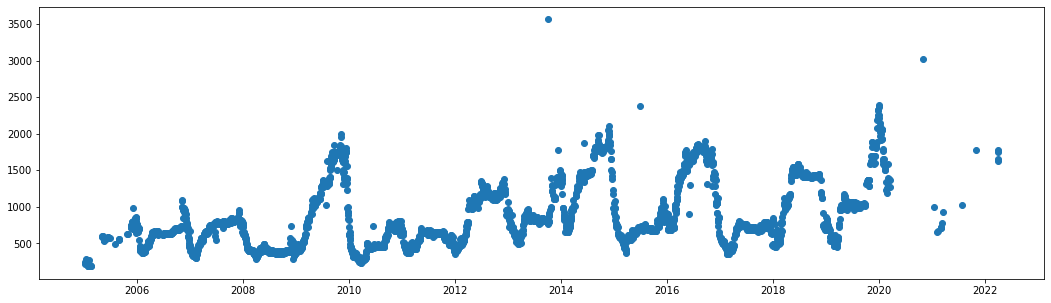

In [ ]:
#Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.scatter(df_new["ds"],df_new["y"])

In [ ]:
#PROPHET PART(ALGORITHM)
import prophet
op=prophet.Prophet()
op.fit(df_new)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7tmaiy/no6ze4wv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7tmaiy/xg1wtxy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13032', 'data', 'file=/tmp/tmpet7tmaiy/no6ze4wv.json', 'init=/tmp/tmpet7tmaiy/xg1wtxy0.json', 'output', 'file=/tmp/tmpfi8wz9g0/prophet_model-20220817121148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast=op.make_future_dataframe(periods=40,freq="D")
forecast=op.predict(forecast)

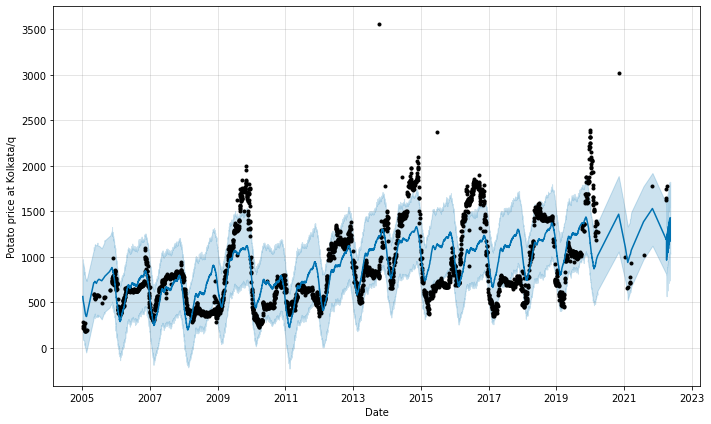

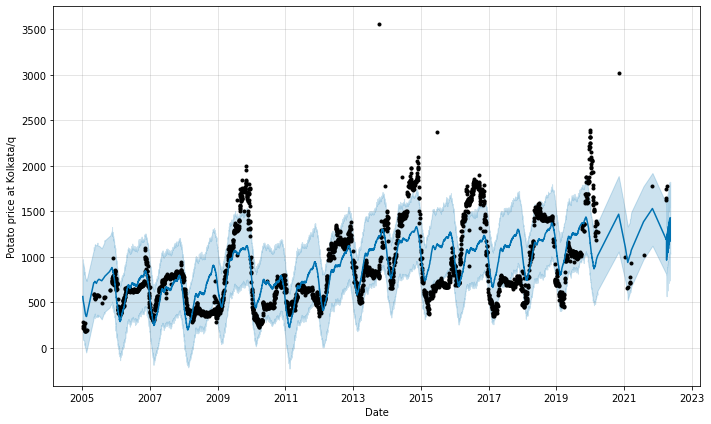

In [ ]:
op.plot(forecast,xlabel="Date",ylabel="Potato price at Kolkata/q")
#black dots - are the actual prices of potatoes from dataframe
#Light blue shade - the minimum and maximum value as pridicted by our model
#Dark blue line - best fit line